# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution
</div>
****

In [256]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


In [257]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [258]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [259]:
data.head()
data.columns

Index(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer',
       'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool',
       'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race',
       'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite',
       'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq',
       'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales',
       'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip',
       'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip',
       'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport',
       'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq',
       'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade',
       'busservice', 'othservice', 'missind', 'ownership'],
      dtype='object')

In [260]:
#Check if our columns of interest have any null values:
data.isna().sum()

id                       0
ad                       0
education                0
ofjobs                   0
yearsexp                 0
honors                   0
volunteer                0
military                 0
empholes                 0
occupspecific            0
occupbroad               0
workinschool             0
email                    0
computerskills           0
specialskills            0
firstname                0
sex                      0
race                     0
h                        0
l                        0
call                     0
city                     0
kind                     0
adid                     0
fracblack               86
fracwhite               86
lmedhhinc               86
fracdropout             86
fraccolp                86
linc                    86
                      ... 
parent_emp            3148
branch_sales          4262
branch_emp            4212
fed                   1768
fracblack_empzip      2952
fracwhite_empzip      2952
l

<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

# Q1: Does CLT apply here? What test should we apply?

**Lets see if CLT will apply here:**

In [261]:
len(data)

4870

In [262]:
w = data[data.race=='w']
b = data[data.race=='b']

In [263]:
print('length of whites: ', len(w))
print('length of blacks: ', len(b))

length of whites:  2435
length of blacks:  2435


So the sample is large with n >> 30 and we can assume independence since n << 10% of the population. Additionally, we know an equal amount of whites vs blacks participated which indicates a normal binomial distribution.

**Lets calculate the sample proportions:**

So we have two samples of equal size and would like to know if there is any statistical significance to the difference in callback numbers. Lets check those numbers:

In [264]:
white_calls = data[data.race=='w']['call'].sum()

In [265]:
black_calls = data[data.race=='b']['call'].sum()

In [266]:
p_w = white_calls/len(w)
p_b = black_calls/len(b)

#Calculate a difference in proportions
p_w_b = p_w - p_b

print('Proportion of whites with callbacks is:', p_w)
print('Proportion of blacks with callbacks is:', p_b)
print('Proportion difference between whites and blacks:', p_w_b)

Proportion of whites with callbacks is: 0.09650924024640657
Proportion of blacks with callbacks is: 0.06447638603696099
Proportion difference between whites and blacks: 0.032032854209445585


**For this analysis we will conduct a 2-sample test where we will look to see if the difference between sample proportions is statistically significant. Lets formulate our hypothesis below:**

# Q2: What are the null and alternate hypotheses?

Ho: p_w = p_b 

Ha: p_w > p_b (proportion of callbacks for whites is greater than that of blacks)

Apha: .05 or 5%

# Q3: Compute the Margin of Error, Confidence Interval and P-Value

In [267]:
#Lets calculate the variance for each population:

w_std = (p_w*(1-p_w))/len(w)

b_std = (p_b*(1-p_b))/len(b)

print('Standard deviation of whites with callbacks is:', w_std)
print('Standard deviation of blacks with callbacks is:', b_std)

Standard deviation of whites with callbacks is: 3.580911983304638e-05
Standard deviation of blacks with callbacks is: 2.4771737856498466e-05


**Judging by the proportion and standard deviation of the callback rate distributions, we can state that they are normally distributed (since we know the binomial distribution goes from 0 to 1). This allows us to make some assumptions about the shape of their difference.**

In [268]:
#Then we calculate std for the difference in distributions w-b

w_b_std = np.sqrt(w_std + b_std)

For the alpha we selected lets calculate a confidence interval and margin of error:

In [269]:
z_critical = stats.norm.ppf(0.95)

print('z-critical: ', z_critical)

z-critical:  1.6448536269514722


In [270]:
moe = w_b_std*z_critical

print('moe: ', moe)

moe:  0.012802505339402668


So in other words we can say that assuming there is no difference in mean callback rates, we have 95% confidence that the difference in sample proportions will not exceed a difference of .012 (or a 1.2% difference in callbacks)

*__Confidence Interval for difference__: Difference in callbacks <= 1.2%*

Lets check the where the actual difference falls on this hypothetical distribution:

In [271]:
#Next lets calculate the z value
z = (p_w_b - 0)/(w_b_std)
print('z-value: ', z)

z-value:  4.11555043573


In [272]:
p_val_from_z = (1 - stats.norm.cdf(z))*2
print('p-value: ', p_val_from_z)

p-value:  3.862565207524149e-05


<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

# Q4: Story about the data

The 2-sample significance test yields a very low p-value in other words the probability of such a difference in proportions given that the null hypothesis (of no difference) is true is close to 0%. So we have to reject the null hypothesis.

**Lets look at the data a bit more carefully:**

In [273]:
yrs_calls = data.groupby(['race','yearsexp'])['call'].sum()



yrs_calls = pd.DataFrame(yrs_calls)
yrs_calls = yrs_calls.rename(columns={yrs_calls.columns[0]:'Call count'})
yrs_calls = yrs_calls.reset_index()

yrs_calls_ct = data.groupby(['race','yearsexp'])['call'].count()
yrs_calls_ct = pd.DataFrame(yrs_calls_ct)
yrs_calls_ct = yrs_calls_ct.reset_index()


yrs_calls['total'] = yrs_calls_ct['call']
yrs_calls['ratio'] = yrs_calls['Call count']/yrs_calls_ct['call']

yrs_calls.head()
# sns.catplot(x='yearsexp', y='ratio', hue='race', data=yrs_calls, height=9, kind="bar")

,race,yearsexp,Call count,total,ratio
0,b,1,1.0,19,0.052632
1,b,2,12.0,177,0.067797
2,b,3,5.0,95,0.052632
3,b,4,14.0,259,0.054054
4,b,5,12.0,264,0.045455


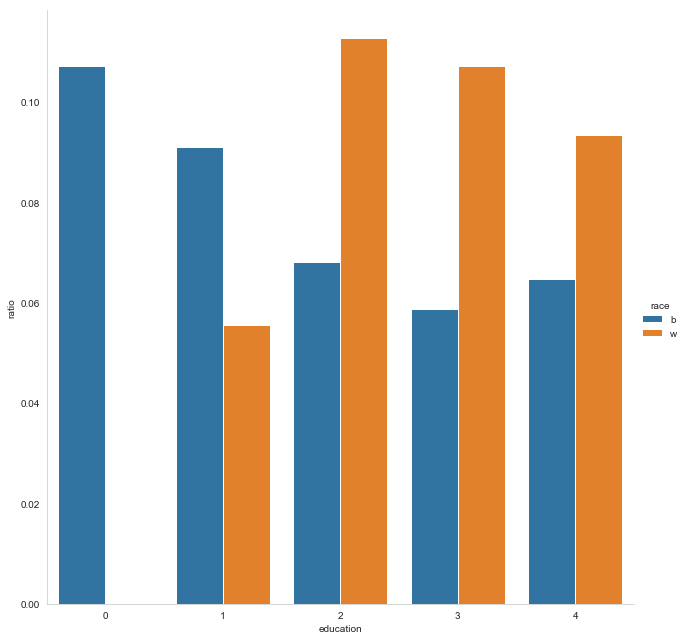

In [274]:
edu_calls = data.groupby(['race','education'])['call'].sum()

edu_calls = pd.DataFrame(edu_calls)
edu_calls = edu_calls.rename(columns={edu_calls.columns[0]:'Call count'})
edu_calls = edu_calls.reset_index()

edu_calls_ct = data.groupby(['race','education'])['call'].count()
edu_calls_ct = pd.DataFrame(edu_calls_ct)
edu_calls_ct = edu_calls_ct.reset_index()

edu_calls_ct.head()
edu_calls['total'] = edu_calls_ct['call']
edu_calls['ratio'] = edu_calls['Call count']/edu_calls_ct['call']



_ = sns.catplot(x='education', y='ratio', hue='race', data=edu_calls, height=9, kind="bar")

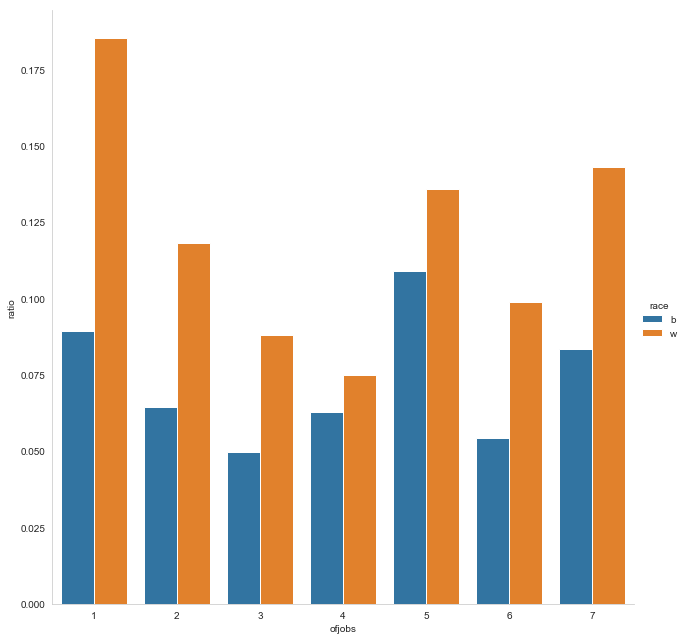

In [275]:
jobs_calls = data.groupby(['race','ofjobs'])['call'].sum()


jobs_calls = pd.DataFrame(jobs_calls)
jobs_calls = jobs_calls.rename(columns={jobs_calls.columns[0]:'Call count'})
jobs_calls = jobs_calls.reset_index()

jobs_calls_ct = data.groupby(['race','ofjobs'])['call'].count()
jobs_calls_ct = pd.DataFrame(jobs_calls_ct)
jobs_calls_ct = jobs_calls_ct.reset_index()


jobs_calls['total'] = jobs_calls_ct['call']
jobs_calls['ratio'] = jobs_calls['Call count']/jobs_calls_ct['call']


_ = sns.catplot(x='ofjobs', y='ratio', hue='race', data=jobs_calls, height=9, kind="bar")

# Q5: Is race the most important factor?

This analysis is fairly revealing since feature for feature tested the results are unbalanced with respect to callbacks by race. 

Race definitely has a large influence in getting a callback. I think the next test i would perform is some type of corellation matrix to evaluate what has the strongest corellation w/r to getting callbacks.

In [276]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')
data = data.replace({'race':{'w':1,'b':0}})
data.race.dtype

dtype('int64')

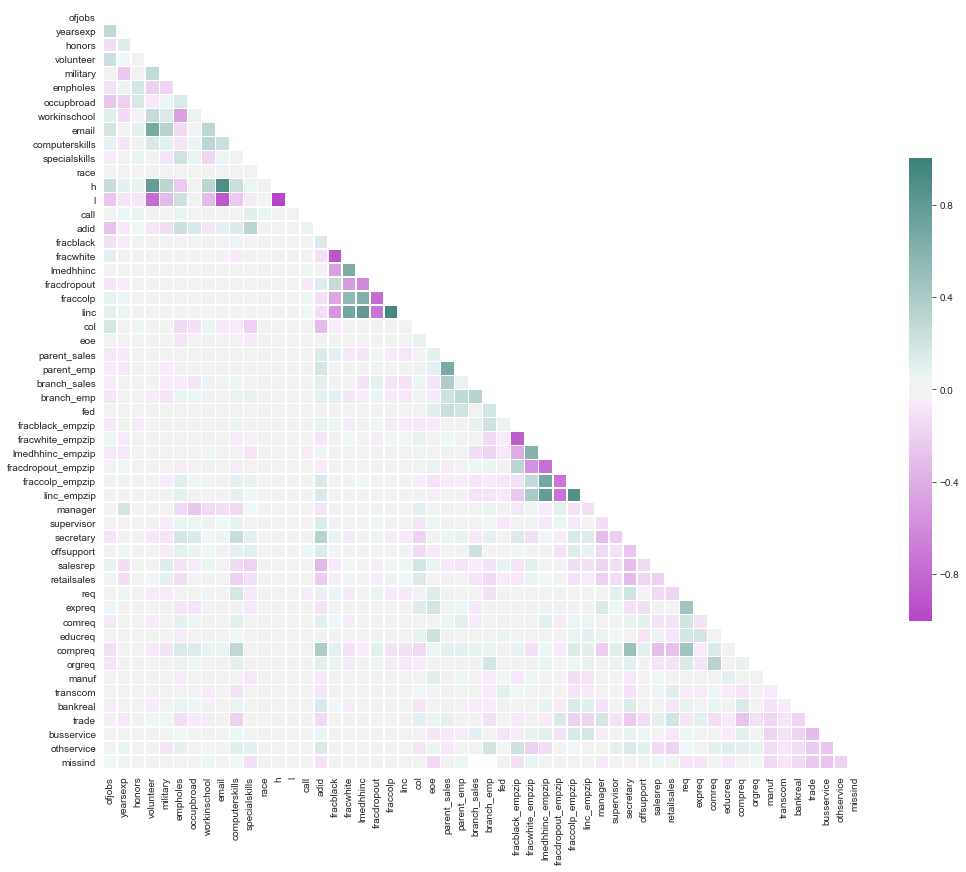

In [277]:

corr = data.select_dtypes(include=['float32', 'int64', 'int8']).iloc[:,1:].corr()

sns.set_style("whitegrid", {'axes.grid' : False})

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(17, 17))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(300, 180, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
_ = sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [278]:
cor_dict = corr['call'].to_dict()

del cor_dict['call']

output = [
    print("{0}: \t{1}".format(*entry))
    for entry in sorted(cor_dict.items(), key = lambda x: x[1], reverse=True)
]

specialskills: 	0.1110743127103042
honors: 	0.07195106891681666
empholes: 	0.071888016528195
adid: 	0.06317821856100413
yearsexp: 	0.06143649028706098
race: 	0.05887209958635942
linc: 	0.04964918991412017
offsupport: 	0.04778342593705669
lmedhhinc: 	0.047699492226663524
fraccolp: 	0.04701560939515582
parent_emp: 	0.039060028683226035
othservice: 	0.03611419380810814
transcom: 	0.03555829229316884
fracwhite: 	0.03514797278927086
occupbroad: 	0.03453585145240745
fraccolp_empzip: 	0.026117647503122322
email: 	0.025880369289598464
h: 	0.02583542265734749
fed: 	0.01447111695546625
fracdropout_empzip: 	0.013951455518367633
fracblack_empzip: 	0.009882141606821443
parent_sales: 	0.008430159590075748
volunteer: 	0.007197011317504166
linc_empzip: 	0.006883121968787626
busservice: 	0.0068819759172008945
secretary: 	0.004038091800540139
eoe: 	0.0030921553856928146
comreq: 	0.002421266777923099
retailsales: 	0.002335717928660761
ofjobs: 	0.0023111491894311663
missind: 	-0.007554988267171547
col: 	-

**Highlighting this result we see the following:**
    
honors: 	0.07195106891681666

empholes: 	0.071888016528195

adid: 	0.06317821856100413

yearsexp: 	0.06143649028706098

race: 	0.05887209958635942
    
    
So looks like race ranks 5th in terms of corellation to callbacks. Honors, empholes, adid and yearexp are the other strong indicators. So although it cant be said race is the most important factor in callback success, its clear it plays a very large role. As we saw in the visualisations, callback ratio per feature is unbalanced by race. 